In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [5]:

# Step 1: Load datasets
train_features = pd.read_csv("/content/drive/MyDrive/Research 3rd year/AnalyticaX/training_set_features.csv")
train_labels = pd.read_csv("/content/drive/MyDrive/Research 3rd year/AnalyticaX/training_set_labels.csv")
test_features = pd.read_csv("/content/drive/MyDrive/Research 3rd year/AnalyticaX/test_set_features.csv")



In [7]:
# Step 2: Exploratory Data Analysis (EDA)
print(train_features.head())


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0              0           1.0             0.0                        0.0   
1              1           3.0             2.0                        0.0   
2              2           1.0             1.0                        0.0   
3              3           1.0             1.0                        0.0   
4              4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0               

In [8]:
print(train_labels.head())


   respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0


In [10]:
print(train_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
print(test_features.head())


   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0          26707           2.0             2.0                        0.0   
1          26708           1.0             1.0                        0.0   
2          26709           2.0             2.0                        0.0   
3          26710           1.0             1.0                        0.0   
4          26711           3.0             1.0                        1.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   1.0                   0.0                    1.0   
1                   0.0                   0.0                    0.0   
2                   0.0                   1.0                    1.0   
3                   0.0                   0.0                    0.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          1.0               

In [11]:
# Step 3: Data Preprocessing
# Handle missing values
train_features.fillna(train_features.mean(), inplace=True)
test_features.fillna(test_features.mean(), inplace=True)

# Encode categorical variables
train_features = pd.get_dummies(train_features)
test_features = pd.get_dummies(test_features)

# Scale numerical features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Step 4: Split training data into features and labels
X_train, X_val, y_train, y_val = train_test_split(train_features_scaled, train_labels, test_size=0.2, random_state=42)


<ipython-input-11-076a19dd6ea7>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_features.fillna(train_features.mean(), inplace=True)
<ipython-input-11-076a19dd6ea7>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_features.fillna(test_features.mean(), inplace=True)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [14]:
# Step 4: Split training data into features and labels
X_train, X_val, y_train, y_val = train_test_split(train_features_scaled, train_labels, test_size=0.2, random_state=42)

# Step 5: Build neural network models
def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_h1n1 = build_model(X_train.shape[1])
model_seasonal = build_model(X_train.shape[1])

In [15]:
# Step 6: Train models
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
history_h1n1 = model_h1n1.fit(X_train, y_train['h1n1_vaccine'], epochs=20, batch_size=64, validation_data=(X_val, y_val['h1n1_vaccine']), callbacks=[early_stopping])
history_seasonal = model_seasonal.fit(X_train, y_train['seasonal_vaccine'], epochs=20, batch_size=64, validation_data=(X_val, y_val['seasonal_vaccine']), callbacks=[early_stopping])

# Step 7: Evaluate models
preds_h1n1 = model_h1n1.predict(X_val).flatten()
preds_seasonal = model_seasonal.predict(X_val).flatten()

roc_auc_h1n1 = roc_auc_score(y_val['h1n1_vaccine'], preds_h1n1)
roc_auc_seasonal = roc_auc_score(y_val['seasonal_vaccine'], preds_seasonal)
overall_score = (roc_auc_h1n1 + roc_auc_seasonal) / 2

print("ROC AUC for H1N1 Vaccine:", roc_auc_h1n1)
print("ROC AUC for Seasonal Vaccine:", roc_auc_seasonal)
print("Overall Score:", overall_score)

Epoch 1/20
334/334 [==============================] - 2s 4ms/step - loss: 0.5325 - accuracy: 0.7637 - val_loss: 0.4260 - val_accuracy: 0.7978
Epoch 2/20
334/334 [==============================] - 1s 3ms/step - loss: 0.4452 - accuracy: 0.8054 - val_loss: 0.4042 - val_accuracy: 0.8268
Epoch 3/20
334/334 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.8138 - val_loss: 0.3927 - val_accuracy: 0.8328
Epoch 4/20
334/334 [==============================] - 1s 3ms/step - loss: 0.4094 - accuracy: 0.8215 - val_loss: 0.3904 - val_accuracy: 0.8341
Epoch 5/20
334/334 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8231 - val_loss: 0.3864 - val_accuracy: 0.8355
Epoch 6/20
334/334 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8284 - val_loss: 0.3834 - val_accuracy: 0.8366
Epoch 7/20
334/334 [==============================] - 2s 5ms/step - loss: 0.3912 - accuracy: 0.8299 - val_loss: 0.3823 - val_accuracy: 0.8355
Epoch 

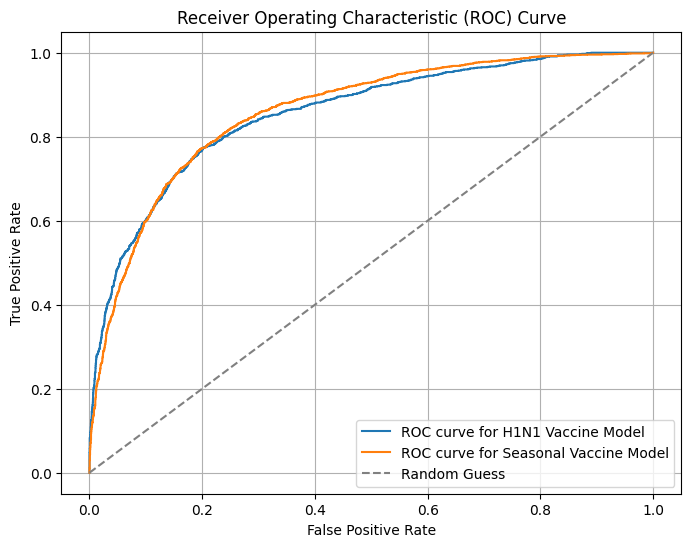

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Calculate ROC curve for H1N1 vaccine model
fpr_h1n1, tpr_h1n1, thresholds_h1n1 = roc_curve(y_val['h1n1_vaccine'], preds_h1n1)

# Calculate ROC curve for seasonal vaccine model
fpr_seasonal, tpr_seasonal, thresholds_seasonal = roc_curve(y_val['seasonal_vaccine'], preds_seasonal)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_h1n1, tpr_h1n1, label='ROC curve for H1N1 Vaccine Model')
plt.plot(fpr_seasonal, tpr_seasonal, label='ROC curve for Seasonal Vaccine Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Step 8: Make predictions on the test set
test_preds_h1n1 = model_h1n1.predict(test_features_scaled).flatten()
test_preds_seasonal = model_seasonal.predict(test_features_scaled).flatten()

835/835 [==============================] - 4s 5ms/step


In [19]:
# Step 9: Prepare submission file
submission_df = pd.DataFrame({
    'respondent_id': test_features['respondent_id'],
    'h1n1_vaccine': test_preds_h1n1,
    'seasonal_vaccine': test_preds_seasonal
})
submission_df.to_csv("submission.csv", index=False)
